In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score
)

import pandas as pd

df_cleaned = pd.read_csv('../data/attrition_cleaned.csv')



In [7]:
X = df_cleaned.select_dtypes(
    include=['int64','float64']
).drop(columns=['Attrition'])

y = df_cleaned['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
  

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

roc_log = roc_auc_score(
    y_test,
    log_model.predict_proba(X_test_scaled)[:,1]
)

print("Logistic ROC-AUC:", roc_log)


[[306 110]
 [ 23  47]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       416
           1       0.30      0.67      0.41        70

    accuracy                           0.73       486
   macro avg       0.61      0.70      0.62       486
weighted avg       0.84      0.73      0.76       486

Logistic ROC-AUC: 0.7834821428571428


In [10]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print(
    "RF ROC-AUC:",
    roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
)


[[406  10]
 [ 55  15]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       416
           1       0.60      0.21      0.32        70

    accuracy                           0.87       486
   macro avg       0.74      0.60      0.62       486
weighted avg       0.84      0.87      0.84       486

RF ROC-AUC: 0.7648695054945054


In [13]:
import os
import joblib

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
MODEL_DIR = os.path.join(BASE_DIR, 'models')

os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(log_model, os.path.join(MODEL_DIR, 'logistic_model.pkl'))
joblib.dump(scaler, os.path.join(MODEL_DIR, 'scaler.pkl'))

print("Saved files:", os.listdir(MODEL_DIR))


Saved files: ['logistic_model.pkl', 'scaler.pkl']


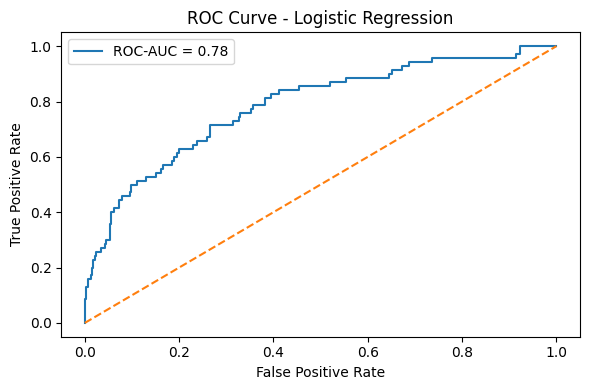

In [15]:
from sklearn.metrics import roc_curve

y_prob = log_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_log:.2f}')
plt.plot([0,1], [0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.tight_layout()
plt.savefig('../images/roc_curve.png', dpi=300)
plt.show()
